In [143]:
import numpy as np
import scipy.linalg as lg
import numpy.linalg as nlg
from sklearn.decomposition import PCA
from sklearn.covariance import EmpiricalCovariance
import matplotlib.pyplot as plt

In [6]:
num_data = 100
len_data = 10
data = np.random.randn((len_data*num_data)).reshape(num_data, len_data)
mean = np.mean(data,axis=0)

In [15]:
cov1 = EmpiricalCovariance().fit(data).covariance_ # uses 1/N
cov2 = np.dot((data-mean).T, (data-mean))/(num_data-1)
print(cov1/cov2)

[[ 0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99]
 [ 0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99]
 [ 0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99]
 [ 0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99]
 [ 0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99]
 [ 0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99]
 [ 0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99]
 [ 0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99]
 [ 0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99]
 [ 0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99]]


In [17]:
# PCA
pca = PCA(svd_solver='full',n_components=len_data).fit(data) #covariance estimate with 1/(n-1)
R   = pca.components_
var = pca.explained_variance_
np.mean(np.dot(np.dot(R.T,np.diag(var)),R)/cov2)

# Eigenvalue
var1, R1 = lg.eigh(cov2)
index = np.argsort(var1)[::-1]
print(np.mean(var1[index]/var))
print(np.mean(np.dot(np.dot(R1,np.diag(var1)),R1.T)/cov2))
R11 = R1.T[index]
var11 = var1[index]
print(np.mean(np.dot(np.dot(R11.T,np.diag(var1[index])),R11)/cov2))

# SingularValue
U, s, Vh = lg.svd(cov2)
index = np.argsort(s)[::-1]
s1    = s[index]
print(np.mean(s1/var11))
print(np.mean(np.dot(np.dot(U,np.diag(s)),Vh)/cov2))
print(np.mean(np.dot(np.dot(U,np.diag(s)),U.T)/cov2))
#with this, it agrees with pca convention
V1 = Vh[index]
print(np.mean(np.dot(np.dot(V1.T,np.diag(s)),V1)/cov2))

1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [154]:
from scipy.stats import ortho_group
data_dim = 3
data_num = 400

In [155]:
R   = ortho_group.rvs(data_dim)
eig = np.arange((data_dim))+1
cov = np.dot(np.dot(R.T,np.diag(eig)),R)
print(cov)
ind = np.where(cov is not 0.)
#cov = (cov+cov.T)/2.
#print(cov)
print(R.T, lg.inv(R))

[[ 1.89765821  0.84859823  0.47647556]
 [ 0.84859823  1.89873835  0.14751619]
 [ 0.47647556  0.14751619  2.20360344]]
[[ 0.72799847  0.20585977 -0.65394188]
 [-0.65322108  0.49786153 -0.57047009]
 [-0.20813566 -0.84246997 -0.49691437]] [[ 0.72799847  0.20585977 -0.65394188]
 [-0.65322108  0.49786153 -0.57047009]
 [-0.20813566 -0.84246997 -0.49691437]]


In [180]:
U, s, Vh = lg.svd(cov)
print(s)
np.mean(np.dot(np.dot(U,np.diag(s)),Vh)[ind]/cov[ind])

[ 3.  2.  1.]


0.999999999999999

In [179]:
v, w = lg.eigh(cov)
Rw = w.T
print(v)
np.mean(np.dot(np.dot(Rw.T,np.diag(v)),Rw)[ind]/cov[ind])

[ 1.  2.  3.]


1.0000000000000004

In [172]:
L = lg.cholesky(cov,lower=True)
data = np.random.randn((data_dim*data_num)).reshape((data_num, data_dim))
data = np.einsum('ij,kj->ki',L,data)
data_= data-np.mean(data, axis=0)
cov_esti = np.dot(data_.T, data_)/(data_num-1)

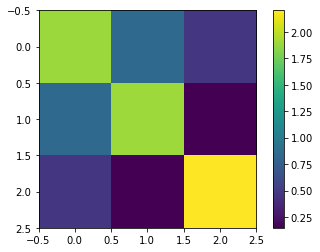

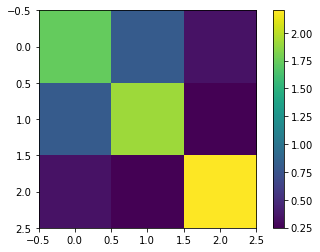

In [173]:
plt.imshow(cov)
plt.colorbar()
plt.show()
plt.imshow(cov_esti)
plt.colorbar()
plt.show()

In [254]:
def create_Gaussian_data(eigs, means, dim, rand_state=42):
    data_dim = len(eigs)
    R    = ortho_group.rvs(data_dim,random_state=rand_state)
    cov  = np.dot(np.dot(R.T,np.diag(eig)),R)
    L    = lg.cholesky(cov,lower=True)
    data = np.random.randn((data_dim*data_num)).reshape((data_num, data_dim))
    data = np.einsum('ij,kj->ki',L,data)+means
    return data, cov

In [255]:
data, cov = create_Gaussian_data([1,2,3],[10,10,10],3)

In [256]:
data_= data-np.mean(data, axis=0)
cov_esti = np.dot(data_.T, data_)/(data_num-1)

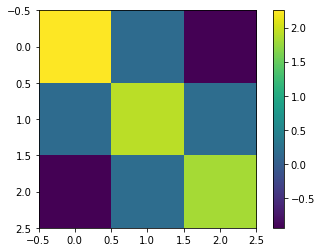

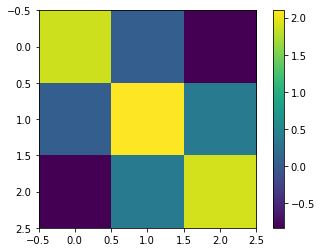

In [257]:
plt.imshow(cov)
plt.colorbar()
plt.show()
plt.imshow(cov_esti)
plt.colorbar()
plt.show()

In [270]:
def nercome_estimator(data,split_frac):
    diags   = []
    Us      = []
    nn      = len(data)
    split   = np.int(split_frac*nn)
    for ii in range(1):
        np.random.shuffle(data)
        data1 = data[0:split]
        data2 = data[split::]
        cov1          = EmpiricalCovariance().fit(X=data1).covariance_
        w1,v1         = lg.eigh(cov1)
        del cov1
        cov2          = EmpiricalCovariance().fit(X=data2).covariance_
        diags         +=[np.diag(np.dot(np.dot(v1.T,cov2),v1))]
        del cov2
        Us            +=[v1]
        
    return np.array(diags), np.array(Us)

In [274]:
for split in [0.33,0.4,0.45,0.5,0.55,0.66,0.7]:
    diags, Us = nercome_estimator(data,split)
    diag = np.mean(diags, axis=0)
    U    = np.mean(Us, axis=0)
    print(split)
    print(np.mean(diag/[1,2,3]))
    print(np.mean(np.dot(np.dot(U,np.diag(diag)),U.T)/cov))

0.33
1.05198777663
0.972630621346
0.4
1.00509992537
1.06395177095
0.45
1.02074796484
1.11964501777
0.5
0.990041153924
1.10662490227
0.55
1.02019732444
0.808987328451
0.66
0.870889056498
0.829509798471
0.7
0.883938778211
0.952136426145


[[ 0.28600818  1.48122272 -0.36058041]
 [ 1.48122272  0.9463833   1.25518307]
 [-0.36058041  1.25518307  0.37376302]]
[[ 0.77222313  0.05369084  0.27369052]
 [ 0.05369084  1.02011862 -0.3561377 ]
 [ 0.27369052 -0.3561377   0.11003472]]


In [246]:
print(cov)

[[ 2.25210098  0.18063032 -0.93590794]
 [ 0.18063032  1.91953731  0.20421702]
 [-0.93590794  0.20421702  1.82836171]]
